# Set up

In [2]:
%run "tools.ipynb"

cuda
time: 109 ms (started: 2024-04-16 12:11:18 +01:00)


# EDA

In [33]:
train_df = pd.read_csv('source/mitbih_train.csv', header=None)
test_df = pd.read_csv('source/mitbih_test.csv', header=None)

if (train_df.isnull().sum().sum()) == 0 :
    print('No missing value in training set!')
    
if (test_df.isnull().sum().sum()) == 0 :
    print('No missing value in test set!')

No missing value in training set!
No missing value in test set!
time: 6.3 s (started: 2024-04-12 20:31:13 +01:00)


In [34]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


time: 1.16 s (started: 2024-04-12 20:31:19 +01:00)


In [3]:
X_train, y_train = _import_data('train')
X_test, y_test = _import_data('test')

time: 5.89 s (started: 2024-04-16 12:11:18 +01:00)


In [4]:
y_train.shape

(87554,)

time: 16 ms (started: 2024-04-16 12:11:24 +01:00)


In [5]:
y_test.shape

(21892,)

time: 15 ms (started: 2024-04-16 12:11:29 +01:00)


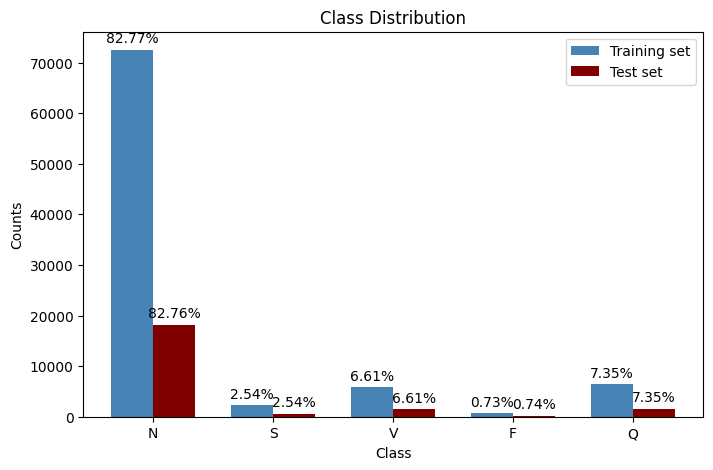

time: 312 ms (started: 2024-04-15 22:52:44 +01:00)


In [7]:
# Create subplot
fig, ax = plt.subplots(figsize=(8, 5))    

# Get class counts for training and test sets
classes, train_counts = np.unique(y_train, return_counts=True)
test_counts = [np.sum(y_test == cls) for cls in classes]

# Calculate total counts for each class
total_counts = train_counts + test_counts

# Set the width of the bars
bar_width = 0.35

# Plot the training set counts
train_bars = ax.bar(classes - bar_width/2, train_counts, width=bar_width, color='steelblue', label='Training set')

# Plot the test set counts
test_bars = ax.bar(classes + bar_width/2, test_counts, width=bar_width, color='maroon', label='Test set')

# Set labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Counts')
ax.set_title('Class Distribution')
label_mapping = {'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4}
ax.set_xticks(list(label_mapping.values()), list(label_mapping.keys()))
ax.legend()

# Annotate the bars with percentage
for bars, counts in zip([train_bars, test_bars], [train_counts, test_counts]):
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        percentage = (count / len(y_train)) * 100 if bars == train_bars else (count / len(y_test)) * 100
        ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

plt.show()

Dataset contains highly imbalanced class, with over 82% belong to majority class N, and less than 10% of other classes each.
Also, train and test set have the same class distribution.

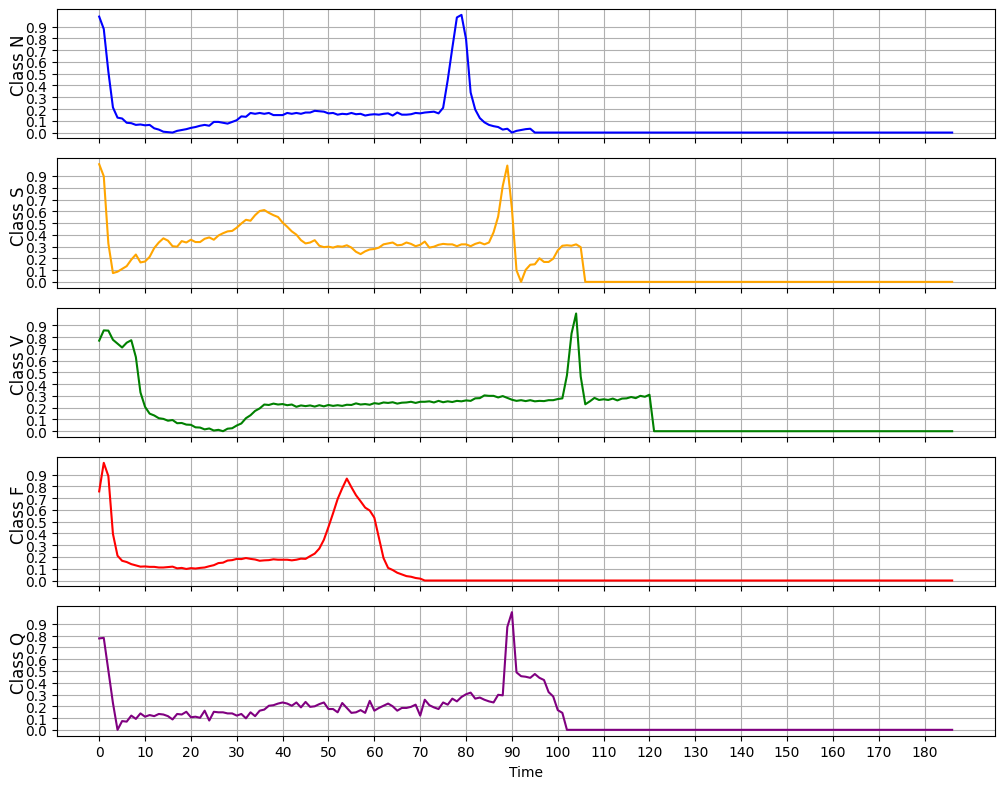

time: 1.03 s (started: 2024-04-15 22:55:52 +01:00)


In [9]:
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
axs = axs.flatten()

# Define colors for each class
label_colors = ['blue', 'orange', 'green', 'red', 'purple']

# Define label mapping
label_mapping = {0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"}

# Store 1 sample per class
samples_per_class = []
for label in np.unique(y_train):
    X_lbl = X_train[y_train == label][10:]
    samples_per_class.append(X_lbl)

# Plot ECG signal for each class
for i, ax in enumerate(axs):
    sample = samples_per_class[i][0]
    ax.plot(sample, color=label_colors[i])
    ax.set_title(f"Class {label_mapping[i]}", rotation='vertical', x=-0.04, y=0.3)
    ax.set_xticks(np.arange(0, len(sample), 10))
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.grid(True)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

Time series plot shows the different pattern in ECG signal among 5 distinct classes.

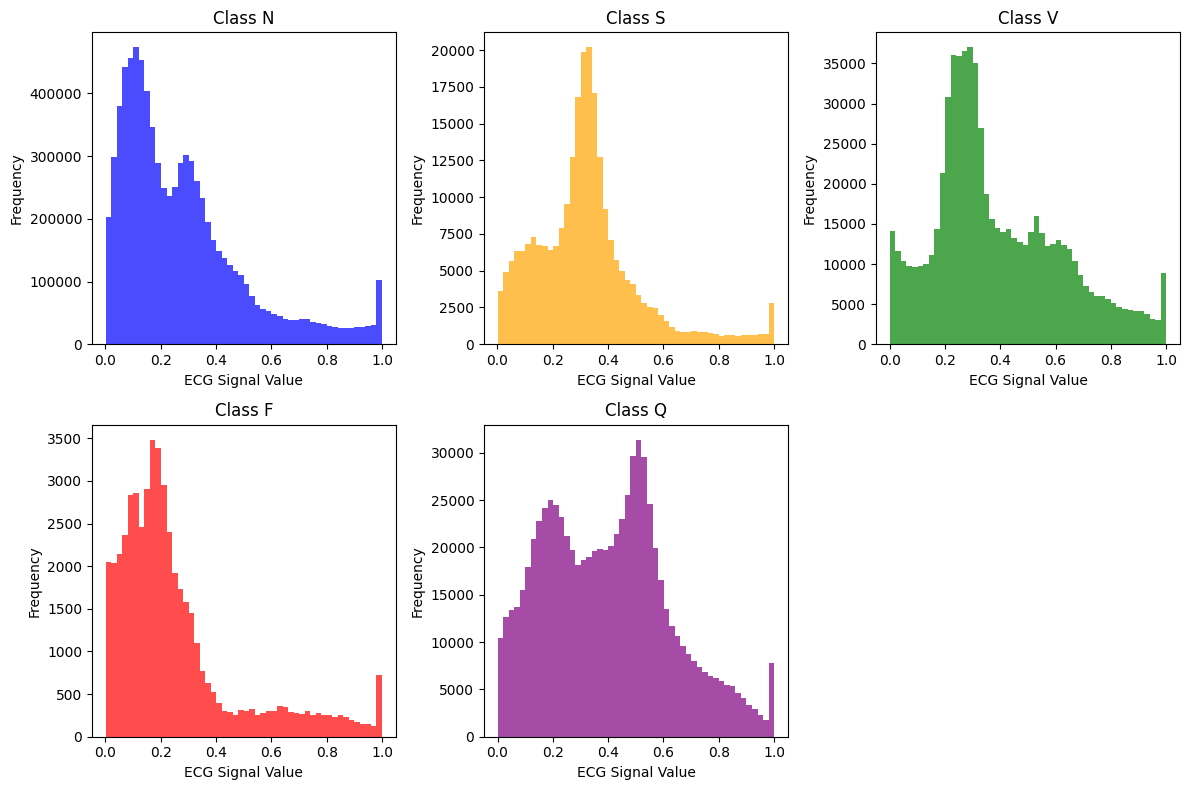

time: 2.49 s (started: 2024-04-15 23:11:09 +01:00)


In [10]:
# Extract each class
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
X_train_2 = X_train[y_train == 2]
X_train_3 = X_train[y_train == 3]
X_train_4 = X_train[y_train == 4]

# Filter out zero-padding
X_train_0 = X_train_0[X_train_0 > 0]
X_train_1 = X_train_1[X_train_1 > 0]
X_train_2 = X_train_2[X_train_2 > 0]
X_train_3 = X_train_3[X_train_3 > 0]
X_train_4 = X_train_4[X_train_4 > 0]

plt.figure(figsize=(12, 8))

# Plot histogram for each class to see data characteristics
plt.subplot(2, 3, 1)
plt.hist(X_train_0.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Class N')
plt.xlabel('ECG Signal Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(X_train_1.flatten(), bins=50, color='orange', alpha=0.7)
plt.title('Class S')
plt.xlabel('ECG Signal Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(X_train_2.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Class V')
plt.xlabel('ECG Signal Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(X_train_3.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Class F')
plt.xlabel('ECG Signal Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(X_train_4.flatten(), bins=50, color='purple', alpha=0.7)
plt.title('Class Q')
plt.xlabel('ECG Signal Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Histograms show the differences in data distribution among 5 classes

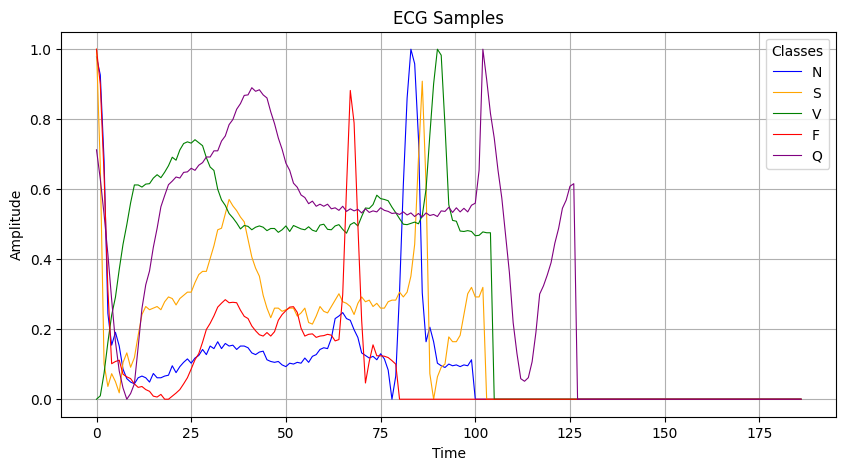

time: 438 ms (started: 2024-04-15 23:14:09 +01:00)


In [11]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Define label mapping
label_mapping = {0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"}

# Define color for each class
colors = ["blue", "orange", "green", "red", "purple"]

# Plot signal of each class
for label in np.unique(y_train):
    # Filter by each class
    X_lbl = X_train[y_train == label][:1]
    for sample in X_lbl:
        ax.plot(sample, color=colors[label], label=label_mapping[label], lw=0.8)

# Define title and label
ax.legend(title="Classes")
ax.set_title("ECG Samples")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ax.grid(True)

plt.show()

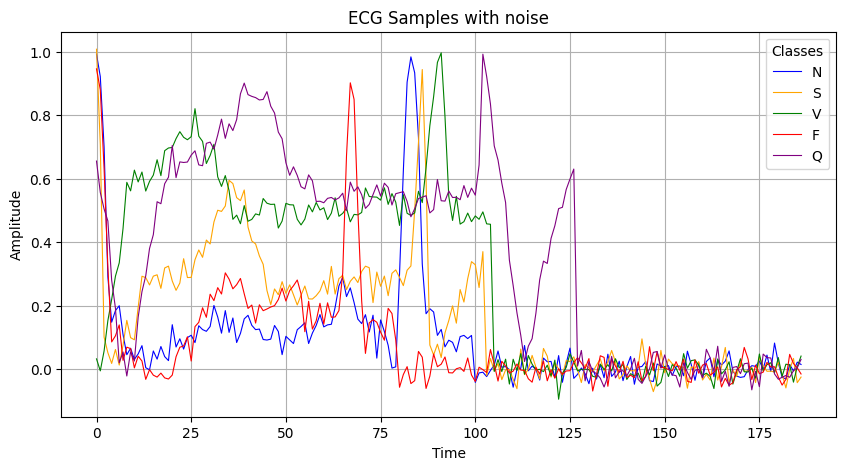

time: 5.11 s (started: 2024-04-15 23:15:22 +01:00)


In [14]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Define label mapping
label_mapping = {0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"}

# Define color for each class
colors = ["blue", "orange", "green", "red", "purple"]

# Plot signal of each class
for label in np.unique(y_train):
    # Filter by each class
    X_lbl = _gaussian_noise(X_train)[y_train == label][:1]
    for sample in X_lbl:
        ax.plot(sample, color=colors[label], label=label_mapping[label], lw=0.8)

# Define title and label
ax.legend(title="Classes")
ax.set_title("ECG Samples with noise")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
ax.grid(True)

plt.show()

ECG signals before and after applied guassian noise for augmentation to make model more generalized to unseen data

# CNN

### Custom CNN

#### Parameters to be tuned through Gridserch on 5 folds cross validation
- Dropout rate
- Number of hidden neurons

In [15]:
param_grid = {
    'module__dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
    'module__neurons': [64, 128, 256]
}

time: 0 ns (started: 2024-04-15 23:27:54 +01:00)


In [61]:
# Perform parameters tuning
best_params = _cnn_pipeline_with_gridsearch(CNN, param_grid,
                                            checkpoint=False,
                                            balance=False, noise=False)

  epoch    train_acc    train_loss    valid_acc    valid_loss    cp      lr      dur
-------  -----------  ------------  -----------  ------------  ----  ------  -------
      1       0.8539        1.1332       0.9439        0.9902     +  0.0100  10.7654
      2       0.9495        0.9751       0.9569        0.9620     +  0.0100  9.0220
      3       0.9601        0.9586       0.9622        0.9516     +  0.0100  9.0153
      4       0.9648        0.9504       0.9655        0.9459     +  0.0100  8.7229
      5       0.9674        0.9453       0.9676        0.9424     +  0.0100  8.8085
      6       0.9693        0.9420       0.9694        0.9401     +  0.0100  8.5856
      7       0.9713        0.9393       0.9709        0.9381     +  0.0100  9.1406
      8       0.9731        0.9370       0.9720        0.9364     +  0.0100  8.8585
      9       0.9747        0.9349       0.9737        0.9349     +  0.0100  8.4018
     10       0.9761        0.9331       0.9742        0.9336     +  0.01

In [62]:
print(best_params)

{'module__dropout': 0.1, 'module__neurons': 128}
time: 0 ns (started: 2024-04-15 10:35:15 +01:00)


#### Train model

Re-initializing module because the following parameters were re-set: dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.


C:\Users\kornk\anaconda3\envs\nn\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  epoch    train_acc    train_loss    valid_acc    valid_loss    cp     dur
-------  -----------  ------------  -----------  ------------  ----  ------
      1       0.9397        0.9689       0.9568        0.9489     +  9.4336
      2       0.9567        0.9489       0.9588        0.9469     +  9.1213
      3       0.9591        0.9462       0.9611        0.9438     +  9.0853
      4       0.9705        0.9361       0.9716        0.9338     +  9.3393
      5       0.9736        0.9320       0.9701        0.9345        9.3094
      6       0.9751        0.9304       0.9733        0.9315     +  10.3064
      7       0.9781        0.9278       0.9785        0.9268     +  7.9249
      8       0.9807        0.9253       0.9788        0.9265     +  9.5960
      9       0.9815        0.9243       0.9794        0.9258     +  9.2702
     10       0.9826        0.9232       0.9816        0.9235     +  9.0372
     11       0.9855        0.9202       0.9830        0.9226     +  9.2424
     12    

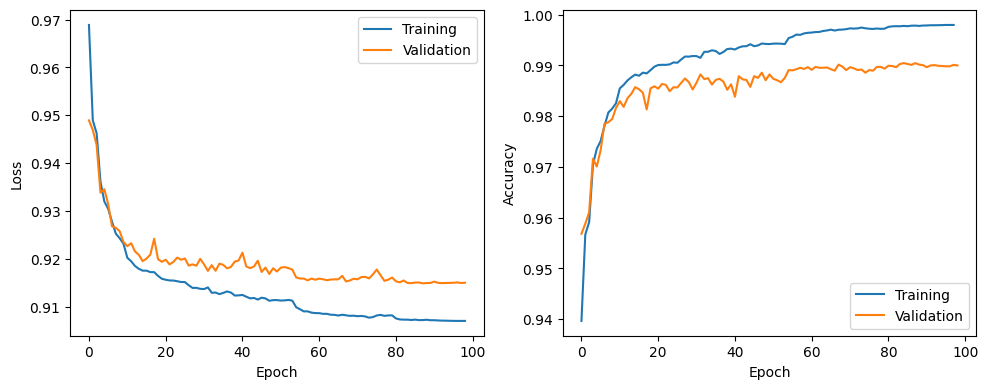

Best model saved to models/cnn/20240415T112137.pth
time: 15min 51s (started: 2024-04-15 11:05:46 +01:00)


In [66]:
# Create final model with best parameter gained from grid search
model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True, 
                                      class_weight=False, balance=False, noise=False)

#### Additional approaches for comparison

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.


C:\Users\kornk\anaconda3\envs\nn\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  epoch    train_acc    train_loss    valid_acc    valid_loss    cp     dur
-------  -----------  ------------  -----------  ------------  ----  ------
      1       0.9412        0.9663       0.9555        0.9511     +  9.4769
      2       0.9567        0.9486       0.9591        0.9459     +  9.0507
      3       0.9593        0.9460       0.9595        0.9455     +  8.9376
      4       0.9605        0.9445       0.9596        0.9454     +  9.0370
      5       0.9615        0.9435       0.9612        0.9440     +  9.2897
      6       0.9623        0.9427       0.9600        0.9446        8.9918
      7       0.9628        0.9421       0.9591        0.9460        8.9469
      8       0.9632        0.9418       0.9614        0.9434     +  9.2820
      9       0.9635        0.9415       0.9608        0.9434     +  8.8828
     10       0.9658        0.9376       0.9725        0.9323     +  9.1782
     11       0.9771        0.9281       0.9775        0.9277     +  9.2035
     12     

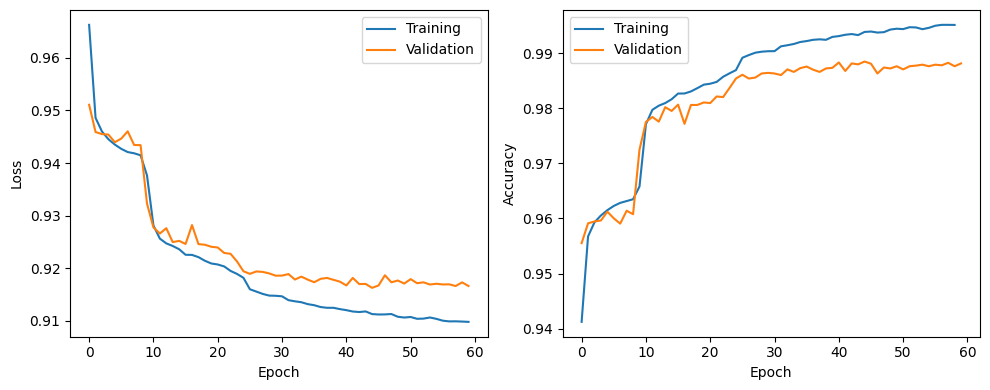

Best model saved to models/cnn/20240413T150503.pth
time: 9min 28s (started: 2024-04-13 14:55:34 +01:00)


In [44]:
# ReLU

best_params = {'module__dropout': 0.1,
               'module__activation': nn.ReLU,
               'module__neurons': 128}

model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True, 
                                      class_weight=False, balance=False, noise=False)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_acc    train_loss    valid_acc    valid_loss    cp      lr     dur
-------  -----------  ------------  -----------  ------------  ----  ------  ------
      1       0.9425        0.9650       0.9575        0.9484     +  0.0500  6.3081
      2       0.9567        0.9485       0.9573        0.9482     +  0.0500  6.3936
      3       0.9593        0.9461       0.9593        0.9456     +  0.0500  6.0357
      4       0.9601        0.9450       0.9605        0.9442     +  0.0500  6.2029
      5       0.9612        0.9440       0.9584        0.9467        0.0500  6.3879
      6       0.9620        0.9430       0.9611        0.9436     +  0.0500  6.2798
      7       0.9627        0.9417       0.9625        0.9411     +  0.0500  6.2113
      8

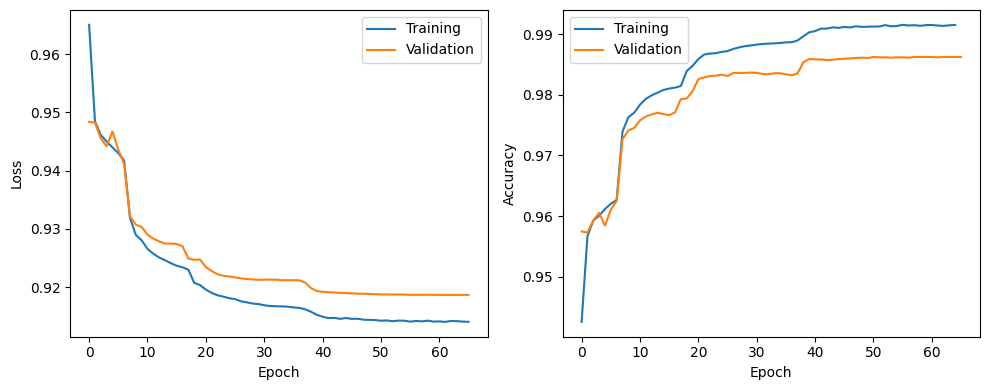

Best model saved to models/cnn/20240413T004512.pth
time: 7min 16s (started: 2024-04-13 00:37:55 +01:00)


In [ ]:
# With LeakyReLU

best_params = {'module__dropout': 0.1,
               'module__activation': nn.LeakyReLU,
               'module__neurons': 128}

%run "Tools.ipynb"
model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True,
                                      class_weight=None, balance=False, noise=False)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion because the following parameters were re-set: weight.
Re-initializing optimizer.


C:\Users\kornk\anaconda3\envs\nn\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  epoch    train_acc    train_loss    valid_acc    valid_loss    cp     dur
-------  -----------  ------------  -----------  ------------  ----  ------
      1       0.7290        1.0989       0.8646        1.0405     +  9.3654
      2       0.8500        1.0405       0.8198        1.0259     +  9.1883
      3       0.8758        1.0237       0.9018        1.0208     +  9.1671
      4       0.8792        1.0157       0.8857        1.0015     +  9.1999
      5       0.8969        1.0021       0.8985        0.9975     +  9.0275
      6       0.9053        0.9975       0.9162        0.9984        9.1147
      7       0.9067        0.9950       0.9148        0.9869     +  9.0160
      8       0.9093        0.9906       0.8907        0.9937        9.1138
      9       0.9169        0.9850       0.9027        0.9894        9.5245
     10       0.9215        0.9812       0.9103        0.9867     +  9.4169
     11       0.9209        0.9745       0.9116        0.9781     +  9.7799
     12     

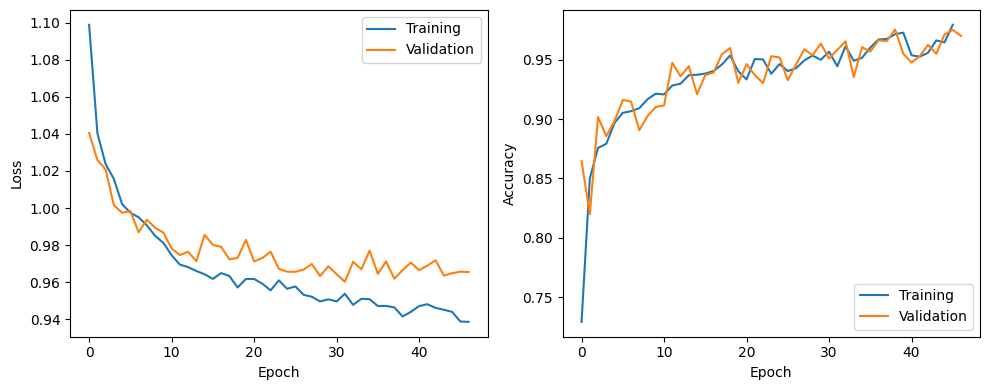

Best model saved to models/cnn/20240413T125808.pth
time: 7min 34s (started: 2024-04-13 12:50:33 +01:00)


In [28]:
# With class weights

best_params = {'module__dropout': 0.1,
               'module__neurons': 128}

model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True, 
                                      class_weight=True, balance=False, noise=False)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_acc    train_loss    valid_acc    valid_loss    cp      lr     dur
-------  -----------  ------------  -----------  ------------  ----  ------  ------
      1       0.9499        0.9594       0.9657        0.9395     +  0.0500  7.5531
      2       0.9693        0.9364       0.9729        0.9322     +  0.0500  7.4975
      3       0.9739        0.9315       0.9746        0.9306     +  0.0500  7.5624
      4       0.9762        0.9290       0.9733        0.9316        0.0500  7.5365
      5       0.9786        0.9268       0.9787        0.9275     +  0.0500  7.6423
      6       0.9818        0.9238       0.9785        0.9271     +  0.0500  7.7520
      7       0.9831        0.9223       0.9790        0.9258     +  0.0500  7.4463
      8

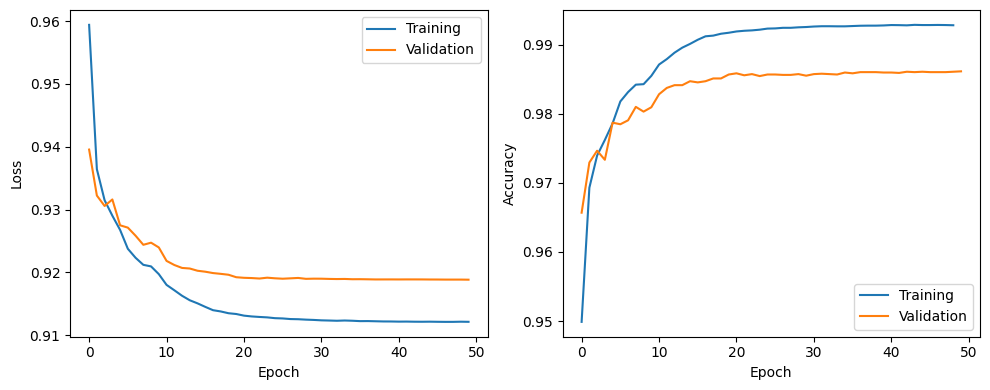

Best model saved to models/cnn/20240413T110602.pth
time: 6min 34s (started: 2024-04-13 10:59:28 +01:00)


In [16]:
# With noise

best_params = {'module__dropout': 0.1,
               'module__neurons': 128}

model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True, 
                                      class_weight=False, balance=False, noise=True)

Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_acc    train_loss    valid_acc    valid_loss    cp      lr     dur
-------  -----------  ------------  -----------  ------------  ----  ------  ------
      1       0.9550        0.1662       0.9643        0.1320     +  0.0100  7.5059
      2       0.9755        0.0916       0.9714        0.1050     +  0.0100  6.5200
      3       0.9799        0.0726       0.9819        0.0722     +  0.0100  6.4677
      4       0.9818        0.0616       0.9790        0.0727        0.0100  6.3224
      5       0.9838        0.0542       0.9797        0.0728        0.0100  6.2651
      6       0.9855        0.0478       0.9830        0.0656     +  0.0100  6.3778
      7       0.9864        0.0433       0.9849        0.0597     +  0.0100  6.3579
      8       0.9870        0.0405       0.9853        0.0583     +  0.0100  6.4560
      9

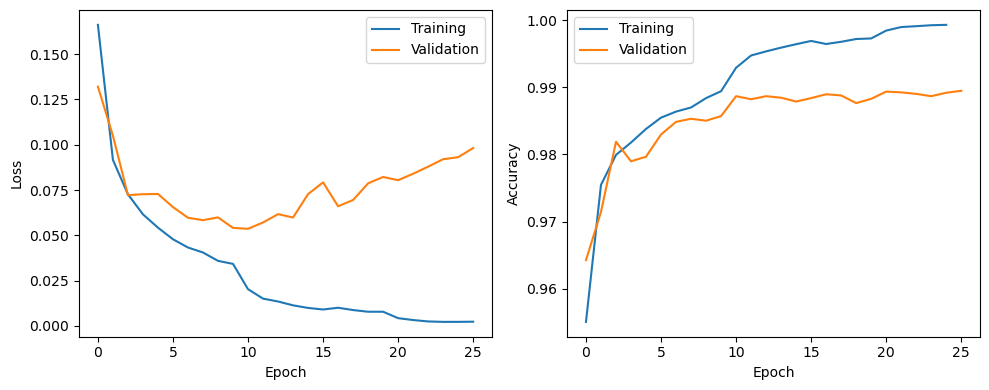

Best model saved to models/cnn/20240403T184404.pth
time: 3min 15s (started: 2024-04-03 18:40:48 +01:00)


In [5]:
# With Step learning rate scheduler

lr_scheduler = LRScheduler(policy='StepLR', step_size=10, gamma=0.3)
best_params = {'module__dropout': 0.1,
               'module__neurons': 128}

model = _cnn_pipeline_with_best_param(CNN, best_params, lrschedule=lr_scheduler, 
                                      earlystop_patience=15, checkpoint=True, 
                                      class_weight=None, balance=False, noise=False)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Re-initializing module because the following parameters were re-set: activation, dropout, neurons.
Re-initializing criterion.
Re-initializing optimizer.


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


  epoch    train_acc    train_loss    valid_acc    valid_loss    cp     dur
-------  -----------  ------------  -----------  ------------  ----  ------
      1       0.6758        1.2347       0.2000        1.7047     +  8.8092
      2       0.6672        1.2391       0.1824        1.7201        8.0163
      3       0.7307        1.1765       0.2256        1.6780     +  8.5924
      4       0.7067        1.1961       0.1801        1.7059        8.8382
      5       0.6751        1.2279       0.1938        1.7038        7.9770
      6       0.6832        1.2193       0.2217        1.6834        8.5457
      7       0.6150        1.2903       0.2005        1.7013        8.7747
      8       0.7340        1.1712       0.1984        1.7093        7.9737
      9       0.7226        1.1774       0.1990        1.7056        8.4941
     10       0.6068        1.2973       0.2000        1.7047        8.8832
     11       0.7558        1.1492       0.1966        1.7074        8.0631
     12     

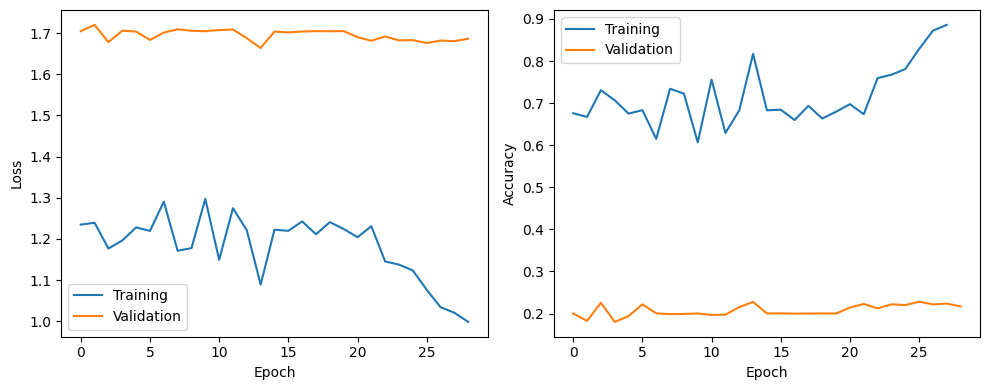

Best model saved to drive/MyDrive/Colab Notebooks/Project/models/cnn/20240415T100929.pth
time: 4min 22s (started: 2024-04-15 10:05:07 +00:00)


In [ ]:
# With data balancing

best_params = {'module__dropout': 0.1,
               'module__neurons': 128}

model = _cnn_pipeline_with_best_param(CNN, best_params,
                                      earlystop_patience=15, checkpoint=True,
                                      class_weight=False, balance=20000, noise=False)

### Residual neural network (based on M. Kachuee et al.)

Re-initializing module because the following parameters were re-set: activation.
Re-initializing criterion because the following parameters were re-set: weight.
Re-initializing optimizer.
  epoch    train_acc    train_loss    valid_acc    valid_loss    cp      lr      dur
-------  -----------  ------------  -----------  ------------  ----  ------  -------
      1       0.6076        1.2688       0.7967        1.1120     +  0.0010  45.0406
      2       0.7822        1.1074       0.8654        1.0803     +  0.0010  22.6163
      3       0.8060        1.0926       0.8294        1.0798     +  0.0010  22.2166
      4       0.8224        1.0680       0.7668        1.0705     +  0.0010  22.8190
      5       0.8533        1.0562       0.9143        1.0421     +  0.0010  22.6351
      6       0.8401        1.0507       0.8675        1.0206     +  0.0010  22.0015
      7       0.8285        1.0527       0.8280        1.0464        0.0010  22.0334
      8       0.8589        1.0421       0.9021

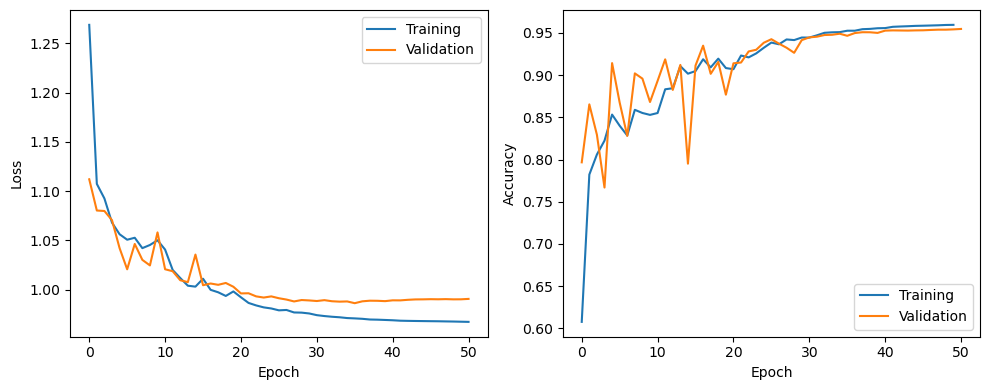

Best model saved to models/cnn/20240403T190703.pth
time: 15min 21s (started: 2024-04-03 18:51:41 +01:00)


In [11]:
params = {'module__activation': nn.ReLU,
          'optimizer': optim.Adam, 
          'lr': 0.001}

scheduler = LRScheduler(policy='ExponentialLR', gamma=0.75)

model = _cnn_pipeline_with_best_param(ResCNN, params, lr_scheduler=scheduler, 
                                      earlystop_patience=15, checkpoint=True, 
                                      optimizer=True)

# SVM

#### Evaluate number of components for PCA and LDA by examining explained variance plot

In [14]:
X_train, y_train = _import_data('train')

time: 5.12 s (started: 2024-04-03 19:09:46 +01:00)


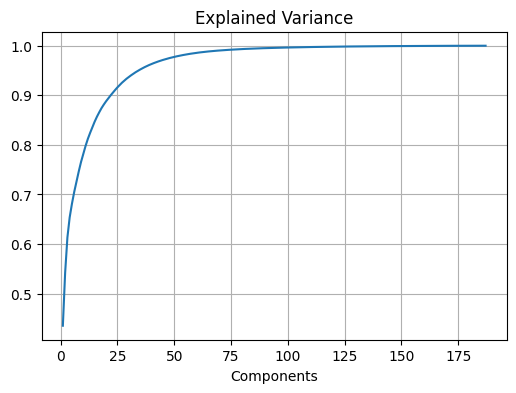

time: 2.36 s (started: 2024-04-16 00:09:09 +01:00)


In [38]:
# Perform PCA on training set
pca = PCA()
pca.fit(X_train)

# Calculate the explained variance ratio
ev_pca = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(ev_pca) + 1), ev_pca)
plt.title('Explained Variance')
plt.xlabel('Components')
plt.grid(True)
plt.show()

From the explained variance plot, 100 components will be used as PCA captures nearly 100% of the variance

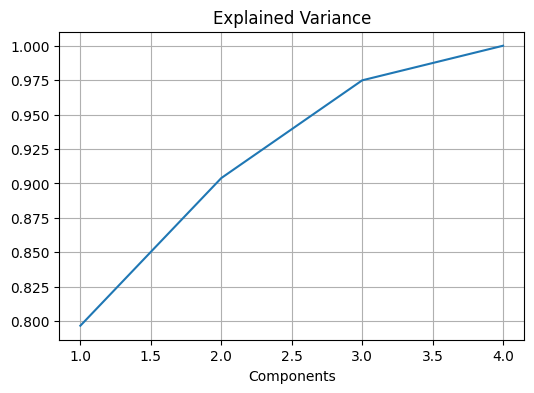

time: 2.48 s (started: 2024-04-16 00:09:14 +01:00)


In [39]:
# Perform LDA on training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Calculate the explained variance ratio
ev_lda = lda.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(ev_lda) + 1), ev_lda)
plt.title('Explained Variance')
plt.xlabel('Components')
plt.grid(True)
plt.show()

From the explained variance plot, 4 components will be used as LDA captures 100% of the variance

#### Parameter Tuning and Model Training

Parameters to be tuned through Gridserch on 5 folds cross validation
- C (Regularization paramater)
- Gamma
- Kernel

In [12]:
params = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['linear', 'rbf'],
}

time: 0 ns (started: 2024-04-03 19:09:20 +01:00)


In [19]:
# With class weight
_svm_pipeline(balanced_sample=None, dimredc=None, 
              n_components=None, n_folds=5, class_weight='balanced', model_fn=None,
              max_iter=1500)

(array([0, 1, 2, 3, 4], dtype=int64), array([72471,  2223,  5788,   641,  6431], dtype=int64))
[LibSVM]

C:\Users\kornk\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Model saved to models/svm/20240327T164911.pkl
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72471
           1       1.00      1.00      1.00      2223
           2       1.00      1.00      1.00      5788
           3       0.98      1.00      0.99       641
           4       1.00      1.00      1.00      6431

    accuracy                           1.00     87554
   macro avg       1.00      1.00      1.00     87554
weighted avg       1.00      1.00      1.00     87554

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.84      0.75      0.79       556
           2       0.96      0.93      0.94      1448
           3       0.85      0.75      0.80       162
           4       1.00      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg 

#### Additional approaches for comparison

In [24]:
# Downsampling majority to 20000, and upsampling using bootstraping method to all minority classes to 20000 each
_svm_pipeline(balanced_sample=20000, dimredc=None, 
              n_components=None, n_folds=5, model_fn=None,
              max_iter=1500)

(array([0, 1, 2, 3, 4], dtype=int64), array([20000, 20000, 20000, 20000, 20000], dtype=int64))
[LibSVM]

C:\Users\kornk\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'svm__C': 1000, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Model saved to models/svm/20240327T195247.pkl
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     72471
           1       0.83      1.00      0.91      2223
           2       0.96      1.00      0.98      5788
           3       0.87      1.00      0.93       641
           4       0.99      1.00      0.99      6431

    accuracy                           0.99     87554
   macro avg       0.93      1.00      0.96     87554
weighted avg       0.99      0.99      0.99     87554

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18118
           1       0.72      0.78      0.75       556
           2       0.92      0.94      0.93      1448
           3       0.74      0.79      0.76       162
           4       0.99      0.97      0.98      1608

    accuracy                           0.97     21892
   macro avg

In [19]:
# With LDA, feature reduction
_svm_pipeline(balanced_sample=None, scaler=None, dimredc='lda', 
              n_components=4, n_folds=5, class_weight='balanced', model_fn=None,
              max_iter=1500)

(array([0, 1, 2, 3, 4], dtype=int64), array([72471,  2223,  5788,   641,  6431], dtype=int64))
[LibSVM]

C:\Users\kornk\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'svm__C': 1000, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Model saved to models/svm/20240403T194254.pkl
              precision    recall  f1-score   support

           0       0.90      0.49      0.64     72471
           1       0.01      0.10      0.02      2223
           2       0.15      0.73      0.25      5788
           3       0.27      0.26      0.26       641
           4       0.13      0.03      0.05      6431

    accuracy                           0.46     87554
   macro avg       0.29      0.32      0.24     87554
weighted avg       0.77      0.46      0.55     87554

time: 15min 5s (started: 2024-04-03 19:29:23 +01:00)


In [23]:
# With PCA, feature reduction
_svm_pipeline(balanced_sample=None, scaler=None, dimredc='pca', 
              n_components=100, n_folds=5, class_weight='balanced', model_fn=None,
              max_iter=1500)

(array([0, 1, 2, 3, 4], dtype=int64), array([72471,  2223,  5788,   641,  6431], dtype=int64))
[LibSVM]

C:\Users\kornk\anaconda3\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'svm__C': 100, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Model saved to models/svm/20240327T180008.pkl
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72471
           1       1.00      1.00      1.00      2223
           2       1.00      1.00      1.00      5788
           3       0.98      1.00      0.99       641
           4       1.00      1.00      1.00      6431

    accuracy                           1.00     87554
   macro avg       0.99      1.00      1.00     87554
weighted avg       1.00      1.00      1.00     87554

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.83      0.74      0.79       556
           2       0.96      0.93      0.94      1448
           3       0.83      0.74      0.78       162
           4       1.00      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg 